In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

# Visualizar as primeiras linhas e a informação geral dos DataFrames
print("Dados de Viagens por Empresa:")
print(df_trips.head())
print(df_trips.info())

print("\nDados de Bairros de Destino:")
print(df_neighborhoods.head())
print(df_neighborhoods.info())

Dados de Viagens por Empresa:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Dados de Bairros de Destino:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (tot

Ambos os conjuntos de dados foram importados com sucesso. Os tipos de dados estão corretos, e não há valores ausentes. Os DataFrames estão limpos e prontos para a visualização de dados e análise. A partir de agora, podemos prosseguir com a identificação dos 10 principais bairros e a criação dos gráficos.

In [2]:
# Identificar os 10 principais bairros

top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)
print("\nTop 10 Bairros de Destino:")
print(top_10_neighborhoods)


Top 10 Bairros de Destino:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Essas informações são valiosas para a empresa Zuber, pois mostram onde a demanda por transporte é mais alta. A concentração de viagens no Loop e no Aeroporto O'Hare indica que a Zuber deve focar seus esforços nessas áreas para atrair mais clientes e competir com outras empresas de táxi.

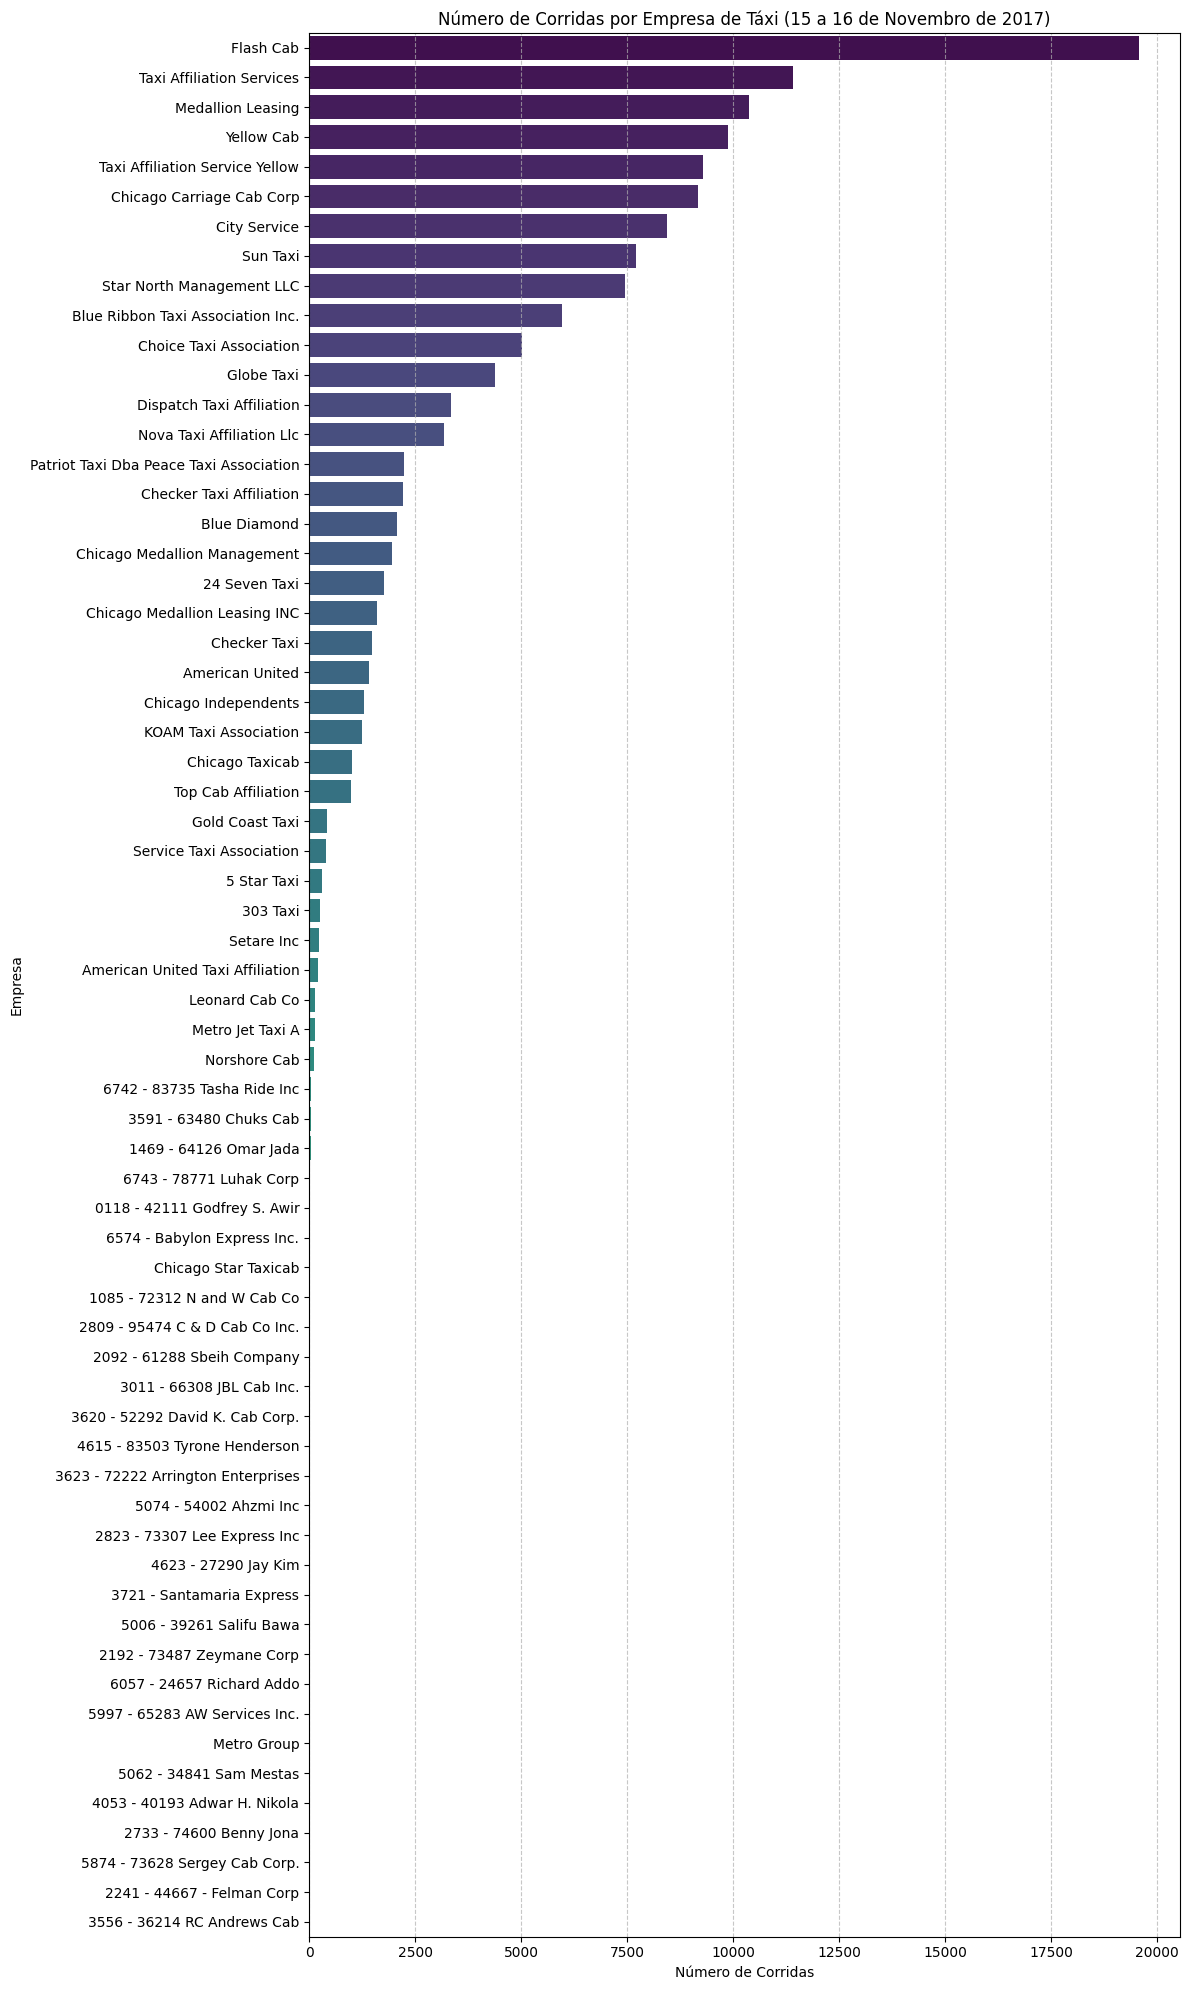

In [5]:
# Gráfico de barras para empresas de táxi e número de corridas
plt.figure(figsize=(12, 20))  
sns.barplot(x='trips_amount', y='company_name', data=df_trips, palette='viridis')
plt.title('Número de Corridas por Empresa de Táxi (15 a 16 de Novembro de 2017)')
plt.xlabel('Número de Corridas')
plt.ylabel('Empresa')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

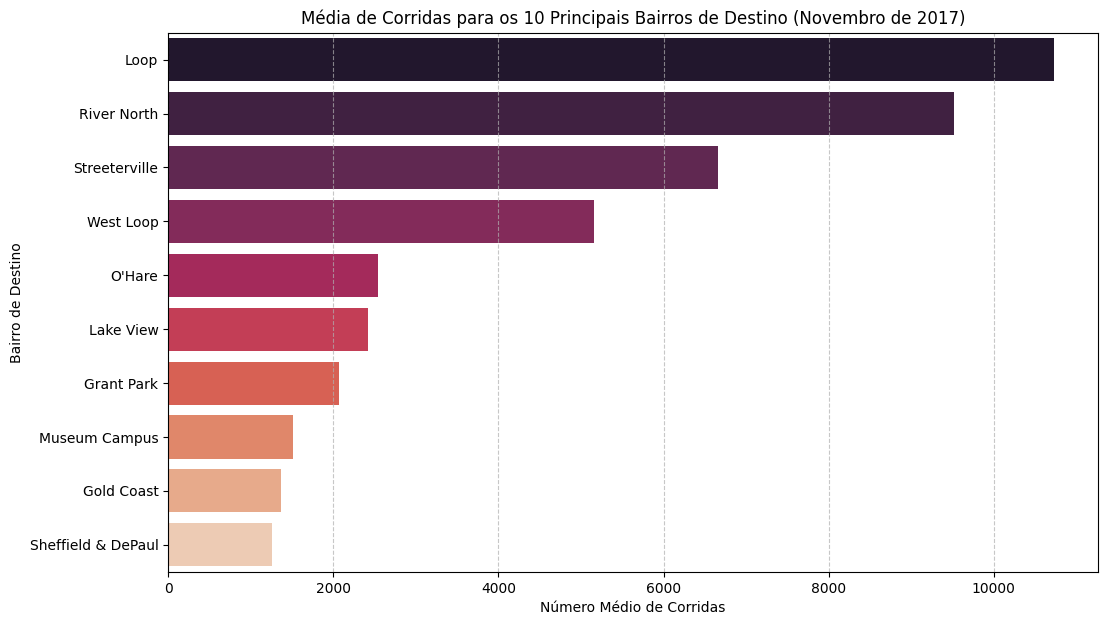

In [6]:
# Gráfico de barras para os 10 principais bairros de destino
plt.figure(figsize=(12, 7))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_neighborhoods, palette='rocket')
plt.title('Média de Corridas para os 10 Principais Bairros de Destino (Novembro de 2017)')
plt.xlabel('Número Médio de Corridas')
plt.ylabel('Bairro de Destino')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Conclusões Baseadas nos Gráficos:

Análise do Gráfico de Empresas de Táxi:

O gráfico "Número de Corridas por Empresa de Táxi" mostra uma distribuição de corridas bastante desigual entre as empresas.

Maior número de corridas: 

A Flash Cab lidera de longe o mercado, com o maior número de corridas.

Distribuição: 

A distribuição não é nada uniforme. Há uma grande concentração de corridas nas primeiras empresas, especialmente a Flash Cab e a Taxi Affiliation Services. As empresas que aparecem mais abaixo na lista têm um número de corridas significativamente menor, o que pode indicar que são empresas menores ou que operam em nichos específicos.

Essa informação é vital para a Zuber, pois mostra quem são os principais concorrentes a serem batidos.

Análise do Gráfico dos 10 Principais Bairros de Destino:

O gráfico "Média de Corridas para os 10 Principais Bairros de Destino" revela a alta demanda por transporte em certas áreas da cidade.

Bairro mais popular: 

O Loop é, de longe, o destino mais popular. Sua média de corridas é muito superior à dos outros bairros.

Diferença entre o primeiro e o décimo: 

Há uma grande e notável diferença entre o bairro mais popular (Loop) e o décimo (Sheffield & DePaul). A média de corridas do Loop é mais que o triplo da média do décimo colocado.

Significado: 

A alta concentração de viagens no Loop e em bairros adjacentes (como River North e Streeterville) sugere que essas áreas são centros de atividade comercial, de negócios e de entretenimento. Além disso, a presença do Aeroporto O'Hare entre os principais destinos confirma a importância dos polos de transporte na demanda por táxis.

Esses gráficos juntos oferecem um panorama completo do mercado de compartilhamento de caronas em Chicago. Eles mostram onde as empresas de táxi estão obtendo a maior parte de seus clientes e quais são as áreas de maior demanda na cidade.

Passo 5: Testando Hipóteses (Python)

In [11]:
from scipy import stats as st

# Carregando os dados do teste de hipótese
df_hypothesis = pd.read_csv('/datasets/project_sql_result_07.csv')

# Verificar e converter tipos de dados se necessário
df_hypothesis['start_ts'] = pd.to_datetime(df_hypothesis['start_ts'])
df_hypothesis['duration_seconds'] = pd.to_numeric(df_hypothesis['duration_seconds'])

# Separar os dados em dois grupos para o teste
bad_weather_trips = df_hypothesis[df_hypothesis['weather_conditions'] == 'Bad']['duration_seconds']
good_weather_trips = df_hypothesis[df_hypothesis['weather_conditions'] == 'Good']['duration_seconds']

In [12]:
#Explorando os dados

# Verificar o tamanho dos grupos e estatísticas básicas
print("Estatísticas dos grupos:")
print(f"Viagens com tempo ruim: {len(bad_weather_trips)} viagens")
print(f"Viagens com tempo bom: {len(good_weather_trips)} viagens")

print(f"\nMédia - Tempo ruim: {bad_weather_trips.mean():.2f} segundos")
print(f"Média - Tempo bom: {good_weather_trips.mean():.2f} segundos")

print(f"\nDesvio padrão - Tempo ruim: {bad_weather_trips.std():.2f}")
print(f"Desvio padrão - Tempo bom: {good_weather_trips.std():.2f}")

Estatísticas dos grupos:
Viagens com tempo ruim: 180 viagens
Viagens com tempo bom: 888 viagens

Média - Tempo ruim: 2427.21 segundos
Média - Tempo bom: 1999.68 segundos

Desvio padrão - Tempo ruim: 721.31
Desvio padrão - Tempo bom: 759.20


Análise das Estatísticas:

Diferença nas médias: 

A média de duração das viagens em dias com tempo ruim (2427.21 segundos) é visivelmente maior do que a média em dias com tempo bom (1999.68 segundos). Isso sugere que a hipótese de que o clima afeta a duração das viagens pode estar correta.

Tamanho dos grupos: 

Há um número de amostras razoável nos dois grupos (180 e 888 viagens), o que é bom para a validade do teste t.

Desvio padrão: 

Os desvios padrões são relativamente próximos (721.31 e 759.20), o que indica que a dispersão dos dados é similar em ambos os grupos. Isso corrobora o uso do teste t de Student.

In [13]:
# Definir nível de significância
alpha = 0.05

# Realizar teste t para duas amostras independentes
t_stat, p_value = st.ttest_ind(bad_weather_trips, good_weather_trips)

print("Resultados do Teste de Hipóteses:")
print(f"Estatística t: {t_stat:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Nível de significância (α): {alpha}")

# Interpretação
if p_value < alpha:
    print(f"\nConclusão: Rejeitamos H₀ (p < {alpha})")
    print("Há evidência estatística de que o clima afeta a duração das viagens.")
else:
    print(f"\nConclusão: Não rejeitamos H₀ (p ≥ {alpha})")
    print("Não há evidência estatística suficiente de diferença.")

Resultados do Teste de Hipóteses:
Estatística t: 6.9462
Valor p: 0.000000
Nível de significância (α): 0.05

Conclusão: Rejeitamos H₀ (p < 0.05)
Há evidência estatística de que o clima afeta a duração das viagens.


Com base nos resultados do teste t de Student, podemos concluir o seguinte:

Estatística t: 6.9462 - Este valor indica a magnitude da diferença entre as médias dos dois grupos (viagens com clima bom vs. ruim) em relação à variabilidade dentro desses grupos. Um valor alto sugere que a diferença entre as médias não é por acaso.

Valor p: 0.000000 - O valor p é essencialmente zero. Isso significa que a probabilidade de a diferença observada nas médias ter ocorrido por puro acaso, assumindo que a hipótese nula é verdadeira, é extremamente baixa.

Nível de significância (α): 0.05 - Decidimos que uma probabilidade de erro de 5% seria aceitável. Como o nosso valor p (quase zero) é muito menor que 0.05, podemos rejeitar a hipótese nula com confiança.

Conclusão
Rejeitamos a hipótese nula.

Há evidências estatísticas fortes para afirmar que a duração média das viagens do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos. A média de duração das viagens em dias com tempo ruim (2427.21 segundos) é significativamente maior do que em dias com tempo bom (1999.68 segundos). Isso sugere que a chuva e tempestade impactam negativamente o tempo de viagem, provavelmente devido a condições de tráfego mais lentas.